# Dimensionality Reduction

The number of input variables/columns or features for a dataset is referred to as its dimensionality.
Dimensionality reduction is a technique that reduce the number of input variables in a dataset.
More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

As the number of features increases, the model becomes more complex. The more the number of features, the more the chances of overfitting. A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on and in turn overfitted, resulting in poor performance on real data, beating the purpose.
Avoiding overfitting is a major motivation for performing dimensionality reduction. The fewer features our training data has, the lesser assumptions our model makes and the simpler it will be. But that is not all and dimensionality reduction has a lot more advantages to offer, like:
1. Less misleading data means model accuracy improves.
2. Less dimensions mean less computing. Less data means that algorithms train faster.
3. Less data means less storage space required.
4. Less dimensions allow usage of algorithms unfit for a large number of dimensions
5. Removes redundant features and noise

The new features are called “intrinsic variables” (as they existed in the data)

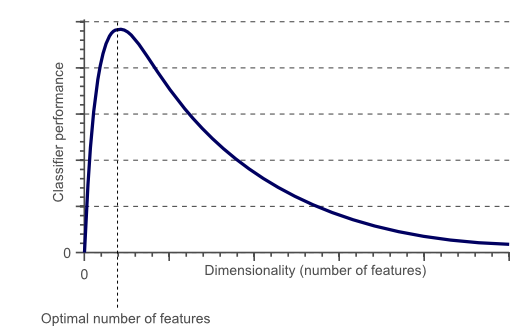

In [9]:
from IPython import display
display.Image("./Dimensionality Reduction.png")

We will focus on 3 methods of dimension reduction:
1. **PCA (Principal Components Analysis)** - Popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum variance are the principal components.
2. **t-SNE (t-distributed Stochastic Neighbor Embedding)** - Computes the probability that pairs of data points in the high-dimensional space are related and then chooses a low-dimensional embedding which produce a similar distribution.
3. **UMAP (Uniform Manifold Approximation and Projection)**


## The Data


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In order to see detailed description of dataset

In [14]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [18]:
df.shape

(569, 30)

In [19]:
# We calculate correlation with Pearson's coefficient using Pandas:
correlation = df.corr(method='pearson')
correlation.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


<AxesSubplot:>

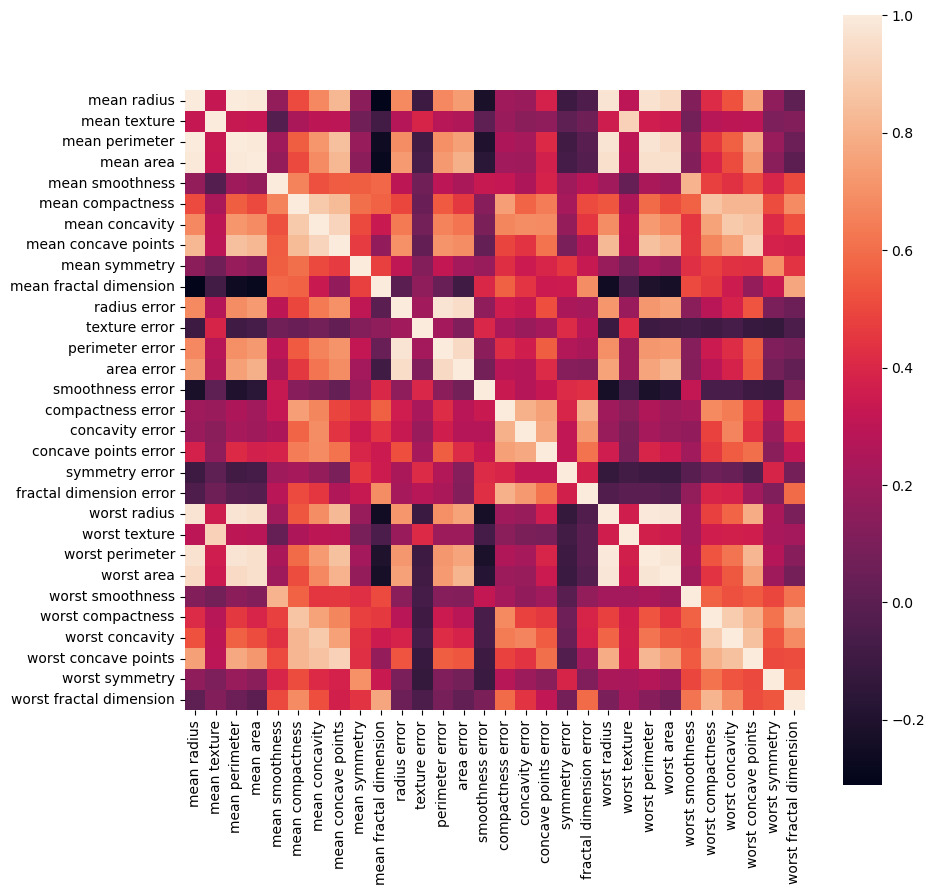

In [20]:
# We create a new figure using matplotlib and set the figure size:
fig=plt.gcf()
fig.set_size_inches(10,10)
# Heatmap of the correlation using Seaborn:
sns.heatmap(correlation, annot=False,square=True)

# PCA (Principal Components Analysis) 


The main idea of PCA is to reduce the dimensionality of a dataset consisting of many variables (i.e. dimensions), while retaining the variation (i.e. the information) present in the dataset up to the maximum extent. The is done by transforming the variables to a new set of variables, which are known as the principal components.
These principal components retain the variation present in original variable in an ordered manner, i.e. first principal component retains maximum information, then second principle component and so on .
So if we can convert a high dimensionality dataset into 2 or 3 dimension while retaining around 80% to 90% of original variation, that really helps

*PCA is efficient for a large number of features

*PCA works on linear transformations only – it misses non-linear features

*A common practice is to first lower dimensions using PCA, preserving most of the feature variance, and then apply a non-linear dimensionality reduction method


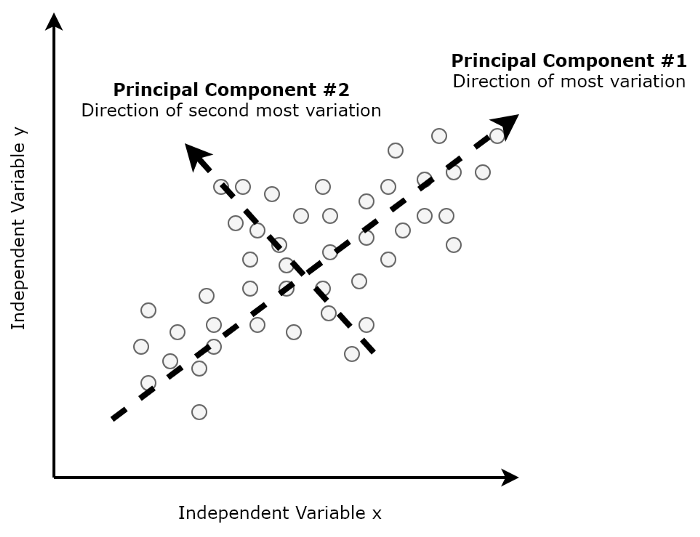

In [21]:
display.Image("./PCA.png")

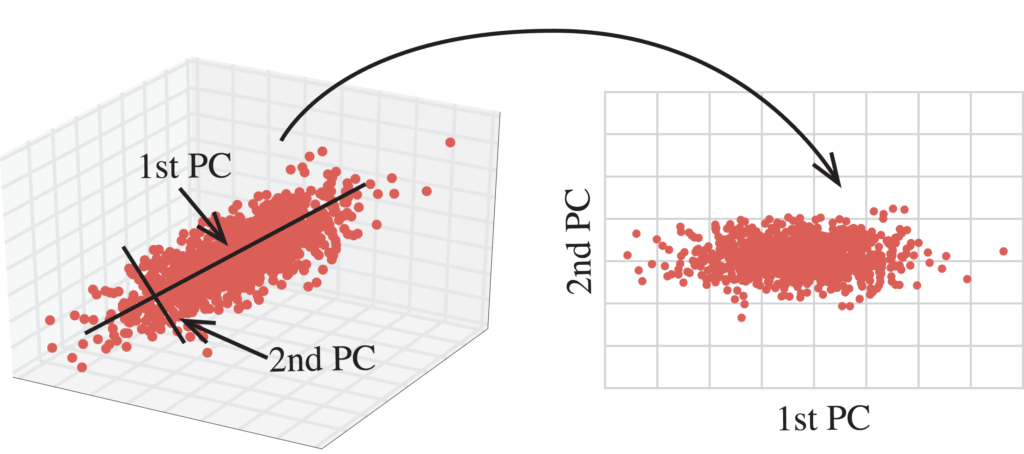

In [22]:
display.Image("./pca2.png")

### Step 1: Normalization

It is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.
Once the standardization is done, all the variables will be transformed to the same scale.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [25]:
print(scaler.mean_)

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


In [26]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)

In [29]:
pca.fit(scaled_data) #Fit the model with X.

PCA(n_components=2)

Now we can transform this data to its first 2 principal components.

In [30]:
x_pca = pca.transform(scaled_data) #Apply dimensionality reduction to X.


In [31]:
scaled_data.shape

(569, 30)

In [32]:
x_pca.shape

(569, 2)

We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

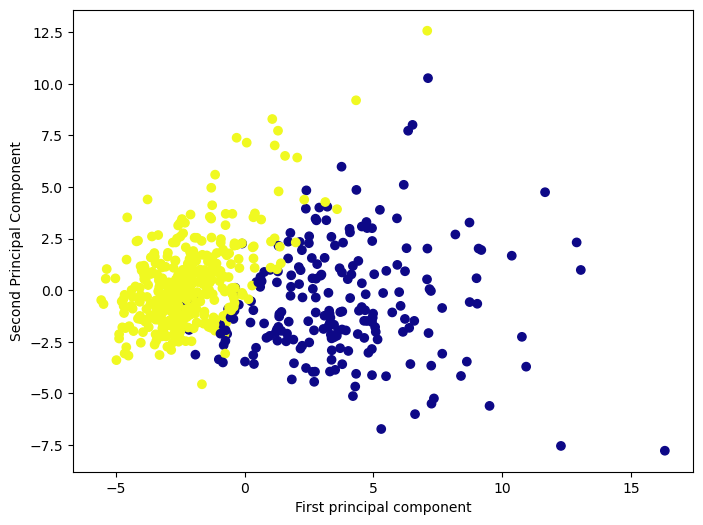

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Another way to display the graph:

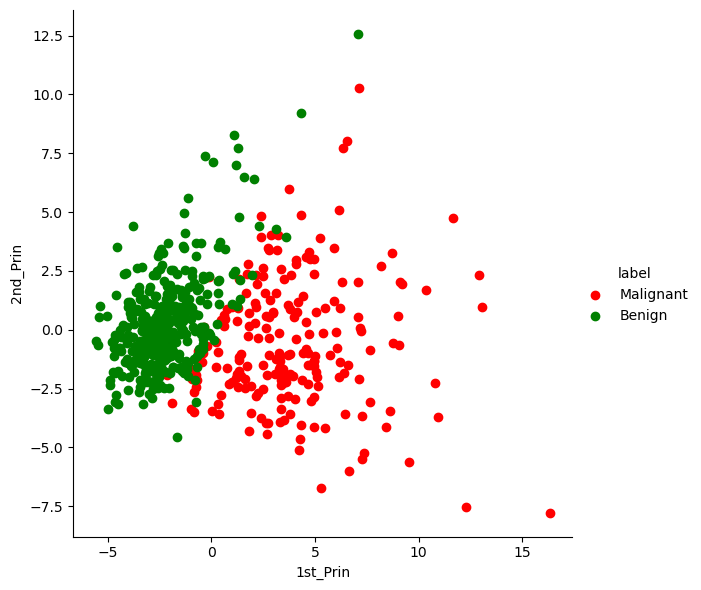

In [34]:
# Create dataframe 
pca_df = pd.DataFrame(np.vstack((x_pca.T, cancer.target)).T,
                      columns = ['1st_Prin', '2nd_Prin', 'label'])


# Replace 0 with Malignant and 1 with Benign
pca_df['label'].replace(0.0, 'Malignant',inplace=True)
pca_df['label'].replace(1.0, 'Benign',inplace=True)

# Check the count of label
pca_df.label.value_counts()

# Benign       357
# Malignant    212
# This count matches with labels as per dataset description

# Create Plot
# Set palette of colors for different labels
pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(pca_df, hue='label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2nd_Prin').\
                   add_legend()

plt.show()


Clearly by using these two components we can easily separate these two classes.



## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [35]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:
We can make a heat-plot to see how the features mixed up to create the components.

In [36]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

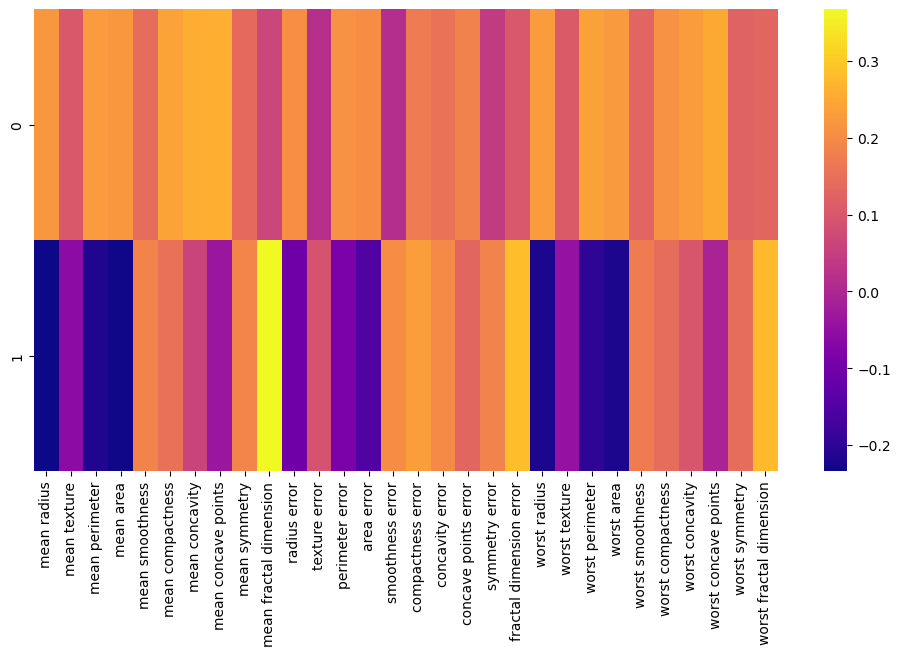

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# t-SNE (t-distributed Stochastic Neighbor Embedding)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful manifold learning algorithm for visualizing clusters. It finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset. In particular, t-SNE gives much more weight to preserving information about distances between points that are neighbors

All data-points are plotted in d -dimension(high) space and a data-point is surrounded by the other data-points of the same class and another data-point is surrounded by the similar data-points and of same class and likewise for all classes. 

So now, if we take any data-point (x) then the surrounding data-points (y, z, etc.) are called the neighborhood of that data-point, neighborhood of any data-point (x) is calculated such that it is geometrically close with that neighborhood data-point (y or z), i.e. by calculating the distance between both data-points. So basically, the neighborhood of x contains points that are closer to x. The technique only tries to preserve the distance of the neighborhood.

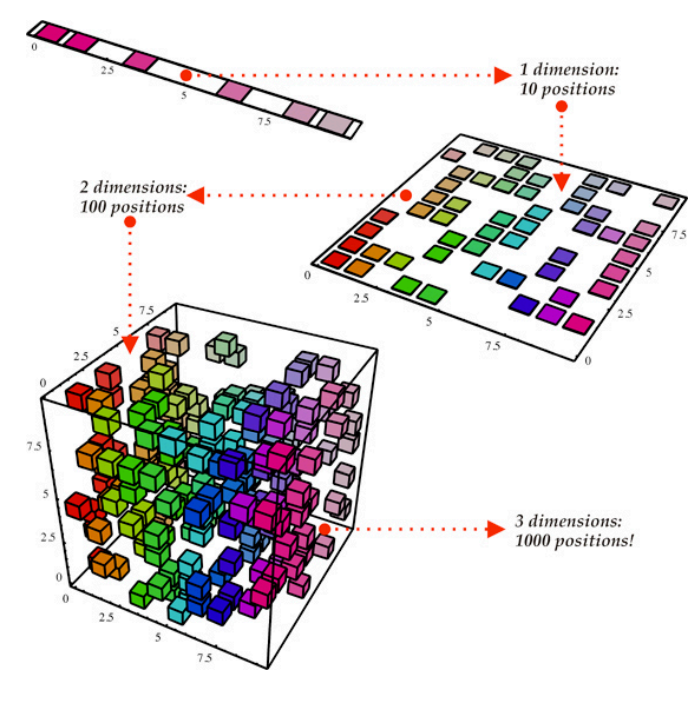

In [38]:
display.Image("./t-sne.png")

In [39]:
from sklearn.manifold import TSNE

In [40]:
data_tsne = df.copy()
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300) 
#The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. 
# Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.
tsne_results = tsne.fit_transform(data_tsne)

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.045609
[t-SNE] KL divergence after 300 iterations: 0.906195


Creating a DataFrame using the t-SNE results, add the hue column and, plot it with seaborn.

In [41]:
tsne_dataset = pd.DataFrame(data = tsne_results, columns = ['component1', 'component2'] )
tsne_dataset

,component1,component2
0,12.226206,-7.899989
1,4.641718,-10.890944
2,9.537955,-9.578881
3,5.200326,-4.896815
4,6.920291,-11.084766
...,...,...
564,10.724008,-12.287038
565,6.415995,-13.255663
566,0.781446,-9.686193
567,11.596992,-8.696027


In [42]:
# Create dataframe 
tsne_df = pd.DataFrame(np.vstack((tsne_results.T, cancer.target)).T,
                      columns = ['1st_Prin', '2nd_Prin', 'label'])

In [43]:
# Replace 0 with Malignant and 1 with Benign
tsne_df['label'].replace(0.0, 'Malignant',inplace=True)
tsne_df['label'].replace(1.0, 'Benign',inplace=True)

In [44]:
# Check the count of label
tsne_df.label.value_counts()

Benign       357
Malignant    212
Name: label, dtype: int64

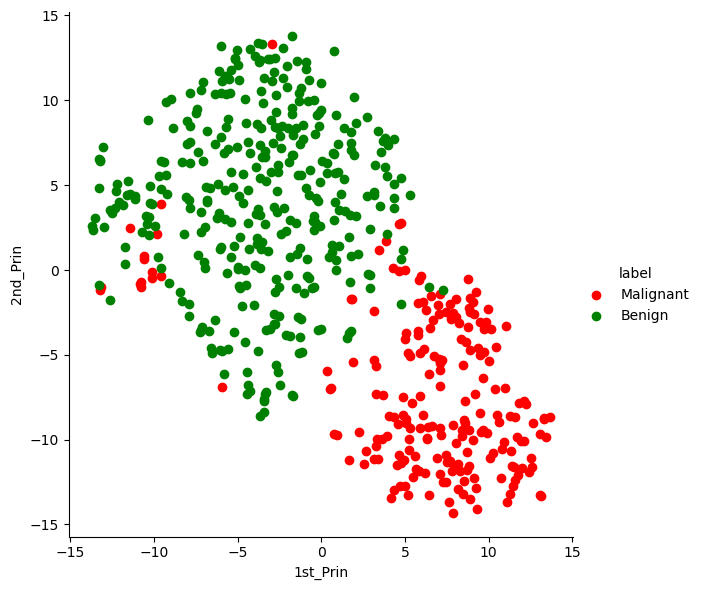

In [45]:
# Benign       357
# Malignant    212
# This count matches with labels as per dataset description

# Create Plot
# Set palette of colors for different labels
pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(tsne_df, hue='label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2nd_Prin').\
                   add_legend()

plt.show()


## tSNE is notorious for producing very different results in different runs. 

In [46]:
data_tsne2 = df.copy()
data_tsne2 = StandardScaler().fit_transform(data_tsne2)
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne2.fit_transform(data_tsne2)

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.869324
[t-SNE] KL divergence after 300 iterations: 0.942459


In [47]:
tsne_dataset2 = pd.DataFrame(data = tsne_results2, columns = ['component1', 'component2'] )
tsne_dataset2

,component1,component2
0,-13.549027,-8.184965
1,-5.963364,-8.356043
2,-10.726766,-8.958385
3,-13.688783,-2.014021
4,-5.414618,-11.029676
...,...,...
564,-10.258460,-12.114849
565,-7.251841,-12.088917
566,-4.249274,-4.151830
567,-13.005141,-9.188844


In [48]:
# Create dataframe 
tsne_df2 = pd.DataFrame(np.vstack((tsne_results2.T, cancer.target)).T,
                      columns = ['1st_Prin', '2nd_Prin', 'label'])

# Replace 0 with Malignant and 1 with Benign
tsne_df2['label'].replace(0.0, 'Malignant',inplace=True)
tsne_df2['label'].replace(1.0, 'Benign',inplace=True)


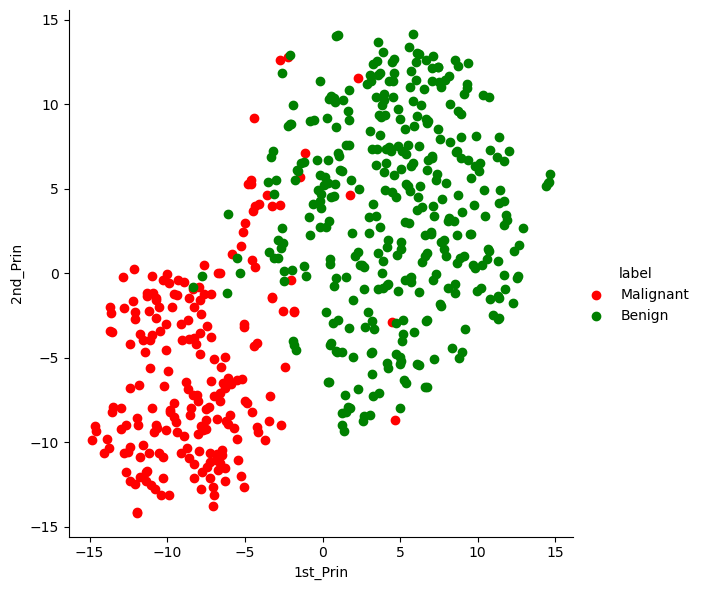

In [49]:
# Create Plot
# Set palette of colors for different labels
pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(tsne_df2, hue='label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2nd_Prin').\
                   add_legend()

plt.show()


# Exercises:

In [50]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['wine']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['wine']='white'

df_wine = pd.concat([df, df2], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### The data:

In [51]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['wine']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['wine']='white'

df_wine = pd.concat([df, df2], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


**1. Make the boxplots using the sns.boxplot.**


As you can see, the values ​​of the variables are on different scales. 
To visualize it better we apply logarithmic scale.

USE: ax.set_xscale('log')

As we can see, the means of the data vary a lot. This happens because the data is on different scales, meaning that different units are used to measure the different features. It is possible to **rescale the data**, which means centering the means of the data. 

**2. Violin plot Violin plots can be used to vizualize both the distribution of the data and the posible outliers in the same figure.**

**3. Make a small heatmap to observe different correlations between all the variables**

Hint: np.triu(correlation)

**4. Use StandardScaler to normilize the data:**


In [52]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'wine'],axis = 1)

In [53]:
scaled = 

SyntaxError: invalid syntax (2734612693.py, line 1)

In [ ]:
df_scaled = pd.DataFrame(data=scaled, columns=data_pca.columns)

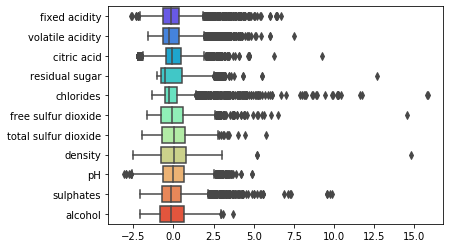

In [ ]:
ax = sns.boxplot(..................)


**5. Now use PCA(n_components=2)to reduce dimensions :**

In [ ]:
pca_results 

array([[-3.20599617,  0.41652332],
       [-3.03905081,  1.10746213],
       [-3.07189347,  0.87896444],
       ...,
       [ 0.5711325 , -0.72266165],
       [ 0.09005243, -3.54577991],
       [ 0.51257566, -2.89104008]])

<Figure size 432x288 with 0 Axes>

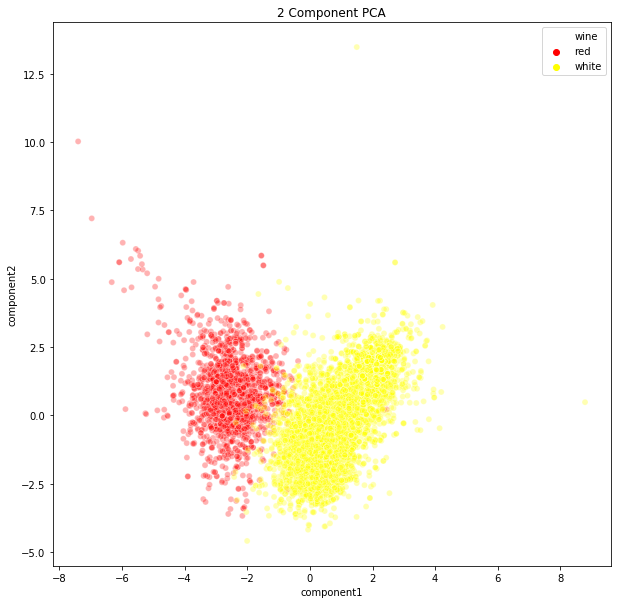